<a href="https://colab.research.google.com/github/VamsiKeerthi/Vehicle-number-plate-detection/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Number Plate detection using openCV and Machine learning**

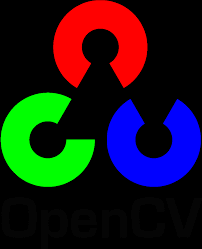

# New section

**Summer Internship Project**

Team members:

Kadimi Varun Chandra Sai-1912163 <br>
Keerthi S M R Vamsi - 1916103 <br>
Shanam Karthik-1912083<br>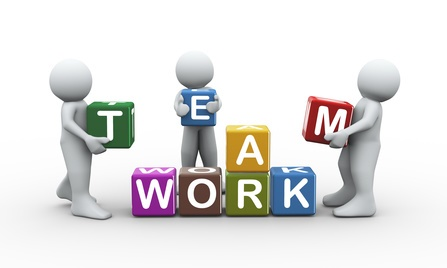

Install required packages


In [ ]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.0 MB/s 
     |████████████████████████████████| 604 kB 64.4 MB/s 
     |████████████████████████████████| 145 kB 60.6 MB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Packages used:
<ul>
<li>Matplotlib</li>
<li>numpy</li>
<li>imutils</li>
<li>easyocr</li>
</ul>

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr




**Read an image and convert it into Grayscale and blur image.**


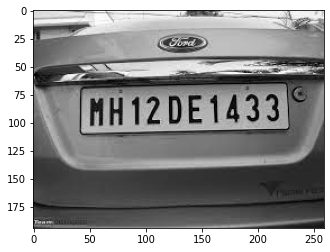

In [ ]:
img = cv2.imread('image9.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

**Apply filter and find edges for localization**

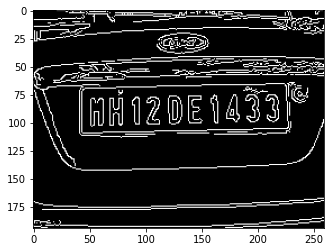

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

**Find Contours and Apply Mask**

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

**Find co-ordinates of number plate.**

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

**Print number plate co-ordinates.**

In [ ]:
location

array([[[225,  67]],

       [[ 46,  69]],

       [[ 43, 108]],

       [[225, 109]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

**Plot colour image of number plate. **

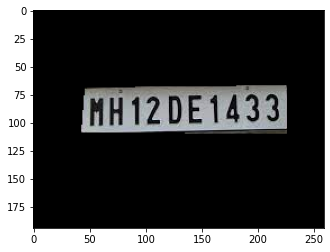

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

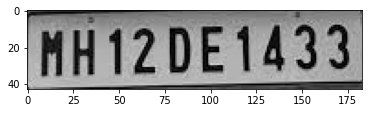

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

**Use Easy OCR To Read Text in Number plate**

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 1], [183, 1], [183, 43], [0, 43]], 'MHIZ DE1433', 0.5989960301892033)]

**Render Result**

MHIZ DE1433


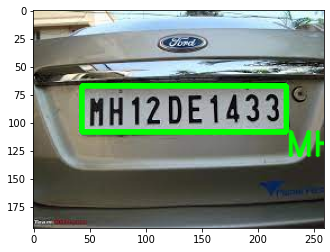

In [ ]:
text = result[0][-2]
if len(result) == 2:
   text= result[0][-2]+ result[1][-2]

print(text)
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))